In [50]:
import matplotlib.pyplot as plt
import pandas as pd


llms = [ 
    "gemma3n",  
    "qwen2.5",  
    "llama3.1",  
    "orca2",  
    "openhermes",  
    "zephyr"
]


examples = {
    "FIC" : "join_examples_dict_1", 
    "CIC" : 'join_examples_dict_2',
    "FSC" : 'vector_based_examples_dict_1',
    "CSC" : 'vector_based_examples_dict_2',
}

model_types = ['TF', 'FT', 'UN', 'IN']


def extract_model_type(model, suffix=""): 
    flag = True
    for ll in llms:
        if ll in model:
            flag = False
    if flag: 
        return "P1"
    elif ' U ' in model: 
        return f"UN{suffix}"
    elif ' ∩ ' in model: 
        return f"IN{suffix}"
    elif '-tf-p2' in model: 
        return "TF"
    elif '-ft-p2' in model: 
        return "FT"
    elif '-z-p2' in model: 
        return "ZS" 
    else: 
        return "P1"


def df_plot_show(groups, color = 'skyblue'): 
    prompt_types = list(groups.keys())
    average_f1 = list(groups.values())


    colors = ['red' if '_ui' in key else 'blue' for key in prompt_types]


    df = pd.DataFrame({"Prompt Types" : prompt_types, "Average F1" : average_f1})

    display(df.style.hide())

    # Create the bar plot
    plt.figure(figsize=(14, 6))
    bars = plt.bar(prompt_types, average_f1, color=colors, alpha=0.8, edgecolor='navy', linewidth=1.2)

    # Customize the plot
    plt.title('F1 Score Averages by Prompt Type', fontsize=16, fontweight='bold')
    plt.xlabel('Prompt Types', fontsize=12)
    plt.ylabel('Average F1 Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()
    




In [51]:
def results_extraction_main(dataset, candidate_pairs): 
    display(f"Dataset {dataset}   - {candidate_pairs}")
        
    results = f'results/{candidate_pairs}/{dataset}_clustering.csv'
    results = pd.read_csv(results)

    results_ui = f'results/{candidate_pairs}/{dataset}_ui.csv'
    results_ui = pd.read_csv(results_ui)
    
    cols = ["precision","recall","f1"]
    
    for col in cols: 
        results_ui[col] = results_ui[col] * 100
    
    results_ui['model_type'] = results_ui['model'].apply(lambda x: extract_model_type(x, "_ui"))
    results['model_type'] = results['model'].apply(lambda x: extract_model_type(x, ''))

    results = results[(results['model_type'] != 'P1')] 
    results_ui = results_ui[results_ui['model_type'] != 'P1']

    groupby = results.groupby(by=['model_type', 'examples'])
    groupby_ui = results_ui.groupby(by=['model_type', 'examples'])

    groups = { 
            "ZS"  : groupby.get_group(("ZS", "vector_based_examples_dict_1"))['f1'].mean()
    }
    for model in model_types: 
        for key in examples: 
            groups[f'{key}-{model}'] = groupby.get_group((model, examples[key]))['f1'].mean()
           
    for model in ['UN', 'IN']:
        for key in examples:
            groups[f'{key}_ui-{model}'] = groupby_ui.get_group((f'{model}_ui', examples[key]))['f1'].mean()

    # groups
    df_plot_show(groups)


'Dataset D2   - original'

Prompt Types,Average F1
ZS,85.648122
FIC-TF,72.778239
CIC-TF,77.501867
FSC-TF,78.242909
CSC-TF,78.562017
FIC-FT,72.266982
CIC-FT,77.216155
FSC-FT,78.400730
CSC-FT,79.721389
FIC-UN,84.847503


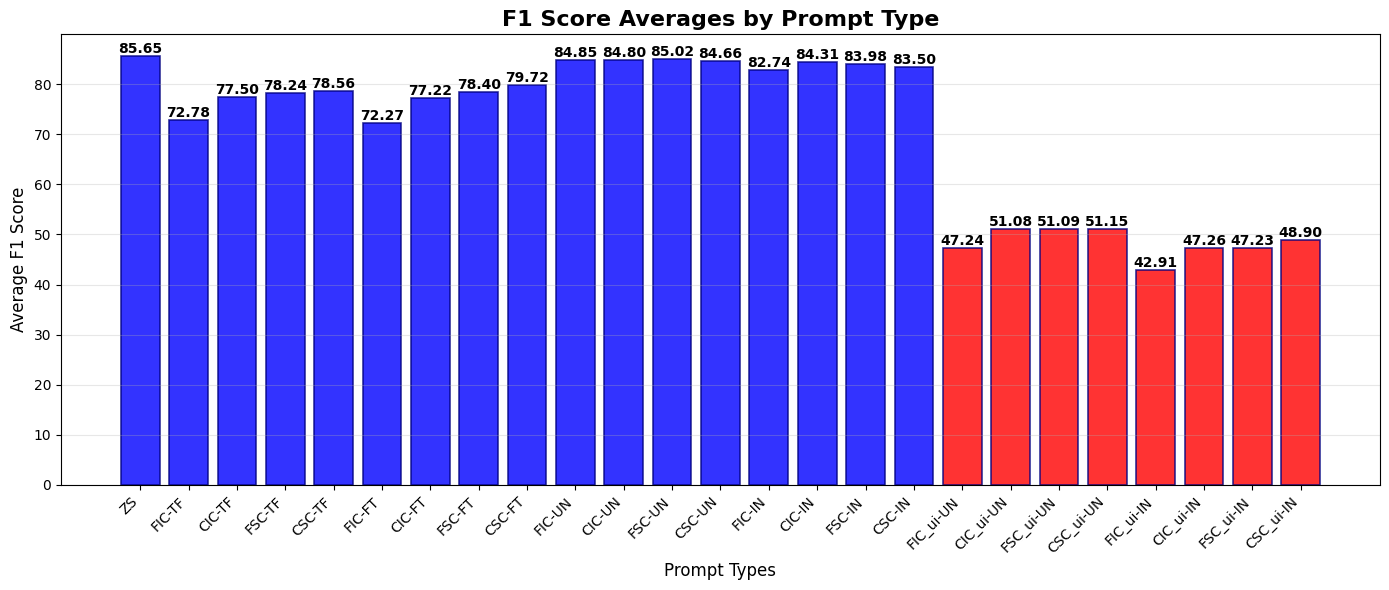

In [52]:

dataset = 'D2'
candidate_pairs = 'original'

results_extraction_main(dataset, candidate_pairs)


'Dataset D5   - original'

Prompt Types,Average F1
ZS,78.289221
FIC-TF,72.671867
CIC-TF,75.186327
FSC-TF,75.810529
CSC-TF,79.978646
FIC-FT,65.579840
CIC-FT,63.755322
FSC-FT,67.243559
CSC-FT,73.689695
FIC-UN,75.613594


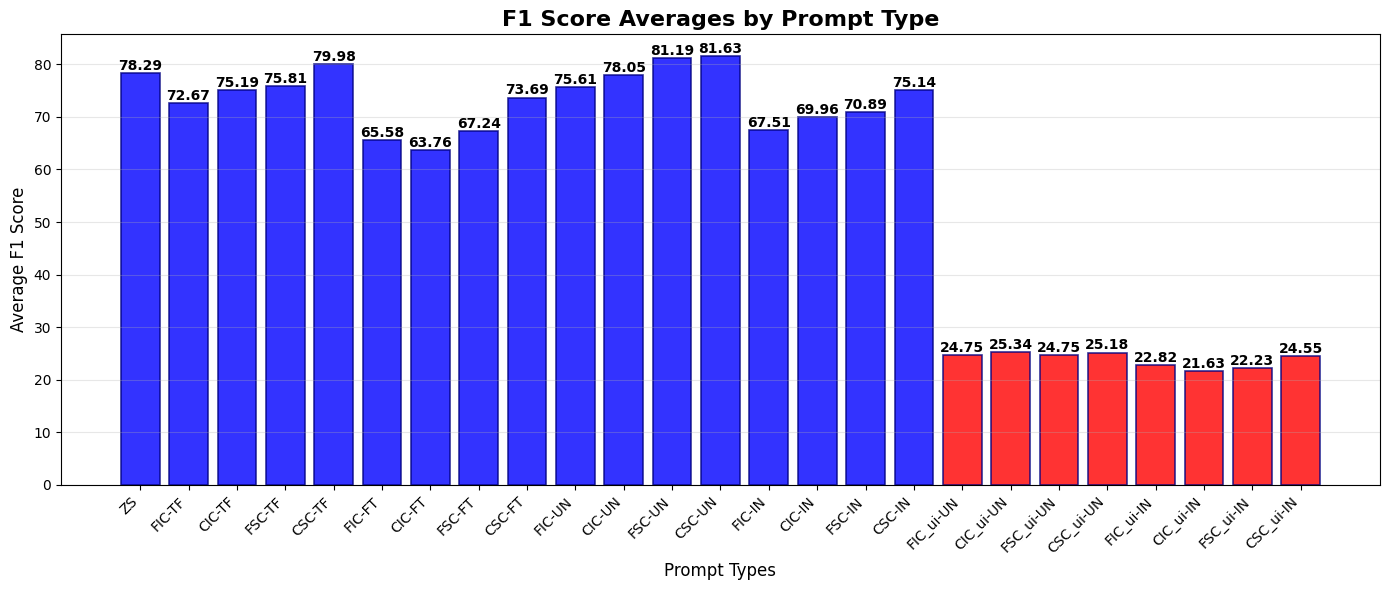

In [53]:

dataset = 'D5'
candidate_pairs = 'original'

results_extraction_main(dataset, candidate_pairs)


'Dataset D6   - original'

Prompt Types,Average F1
ZS,64.812742
FIC-TF,59.690448
CIC-TF,62.431347
FSC-TF,57.566740
CSC-TF,56.802360
FIC-FT,54.755878
CIC-FT,58.583674
FSC-FT,56.381626
CSC-FT,55.234783
FIC-UN,64.783372


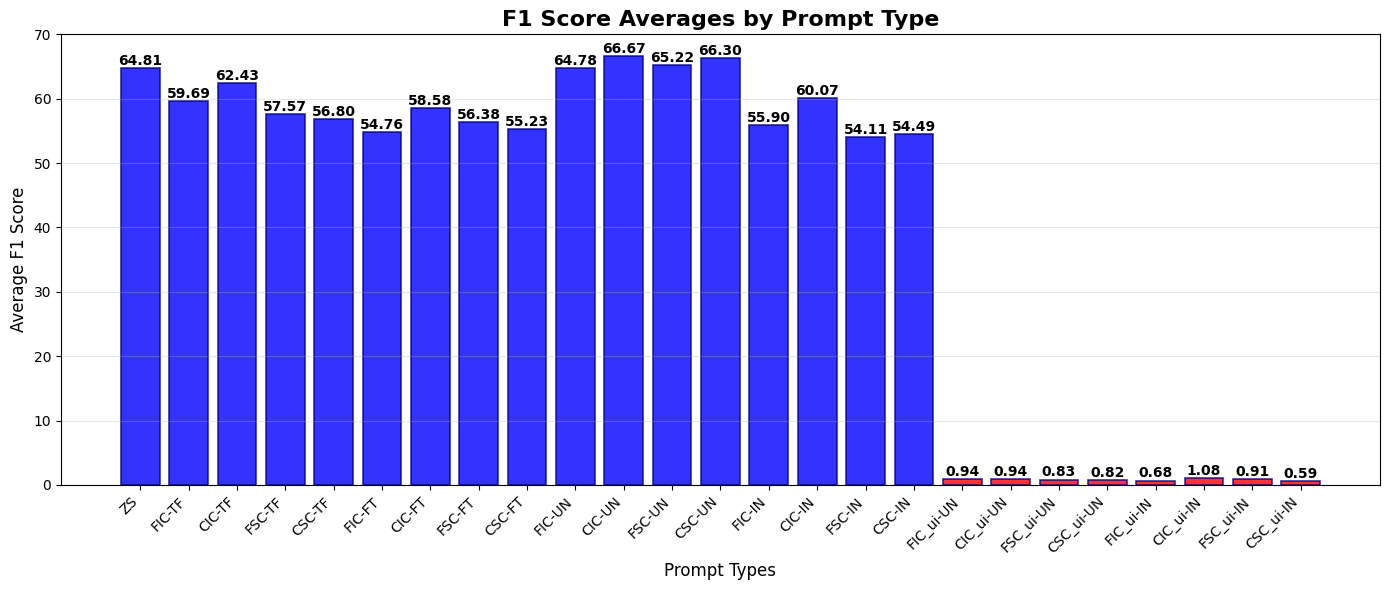

In [54]:

dataset = 'D6'
candidate_pairs = 'original'

results_extraction_main(dataset, candidate_pairs)


'Dataset D7   - original'

Prompt Types,Average F1
ZS,65.002244
FIC-TF,58.873947
CIC-TF,62.439099
FSC-TF,58.669734
CSC-TF,61.875001
FIC-FT,56.369570
CIC-FT,58.954956
FSC-FT,61.197190
CSC-FT,58.560940
FIC-UN,64.125688


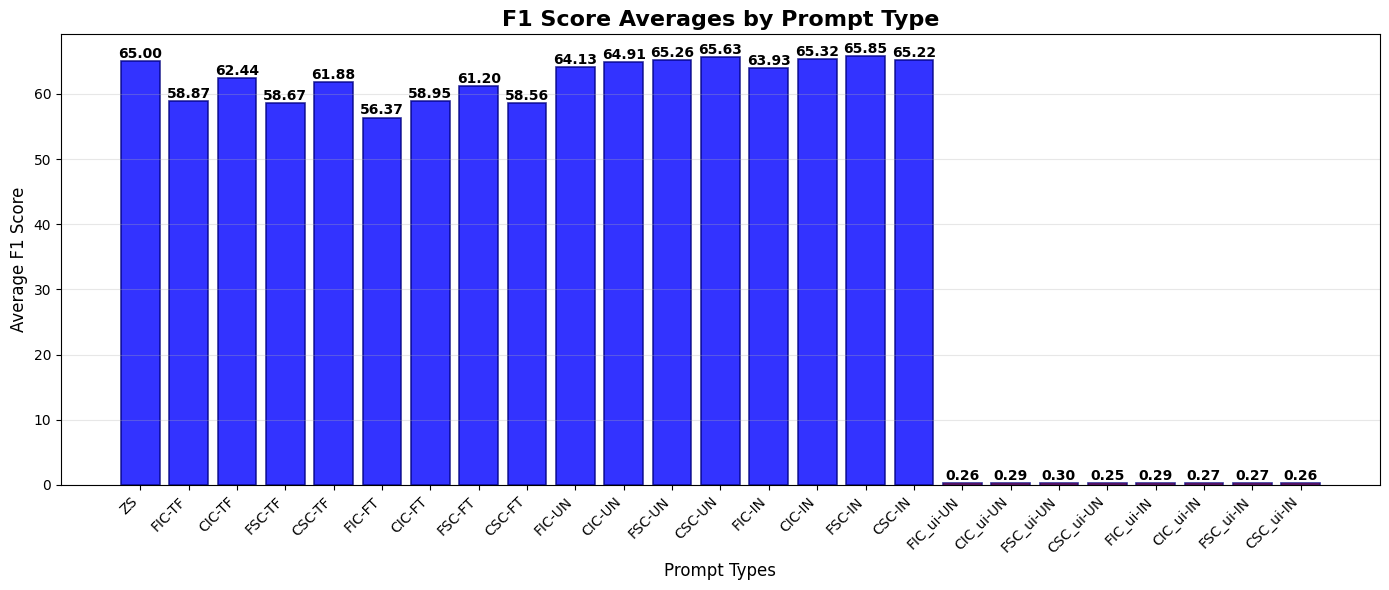

In [55]:

dataset = 'D7'
candidate_pairs = 'original'

results_extraction_main(dataset, candidate_pairs)


'Dataset D8   - original'

Prompt Types,Average F1
ZS,54.359918
FIC-TF,47.018725
CIC-TF,49.430813
FSC-TF,45.902821
CSC-TF,44.588773
FIC-FT,44.309570
CIC-FT,44.575927
FSC-FT,43.618100
CSC-FT,43.313185
FIC-UN,51.901317


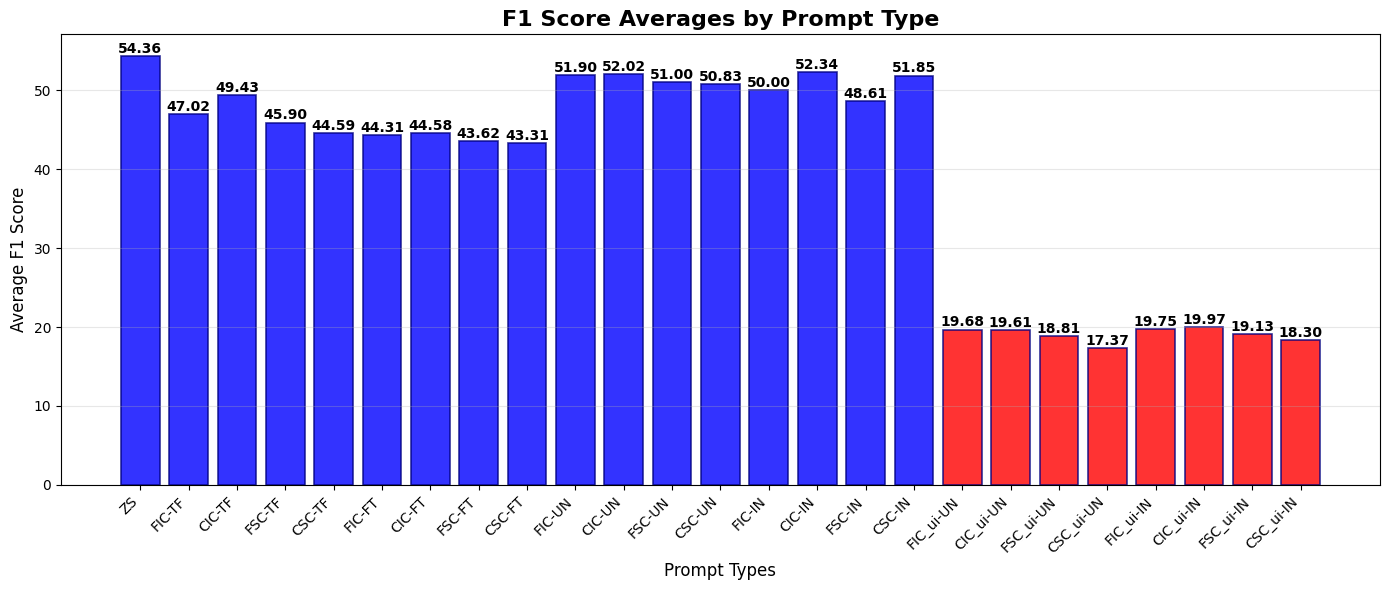

In [56]:

dataset = 'D8'
candidate_pairs = 'original'

results_extraction_main(dataset, candidate_pairs)


'Dataset D2   - standard_blocking'

Prompt Types,Average F1
ZS,82.580939
FIC-TF,68.151791
CIC-TF,69.690637
FSC-TF,72.678474
CSC-TF,69.793950
FIC-FT,68.014826
CIC-FT,68.554503
FSC-FT,70.902988
CSC-FT,72.087427
FIC-UN,81.875924


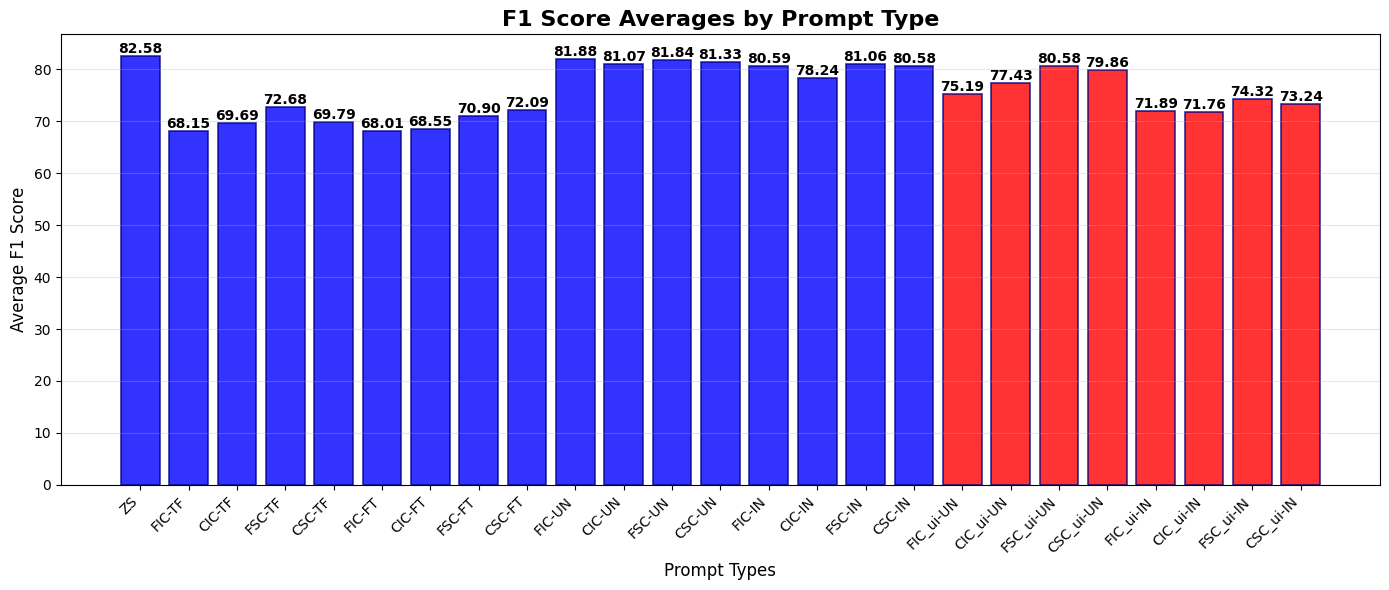

In [57]:

dataset = 'D2'
candidate_pairs = 'standard_blocking'

results_extraction_main(dataset, candidate_pairs)


'Dataset D5   - standard_blocking'

Prompt Types,Average F1
ZS,75.402408
FIC-TF,65.729780
CIC-TF,73.449235
FSC-TF,70.699375
CSC-TF,76.063613
FIC-FT,55.609826
CIC-FT,63.610269
FSC-FT,66.327462
CSC-FT,67.303937
FIC-UN,70.290240


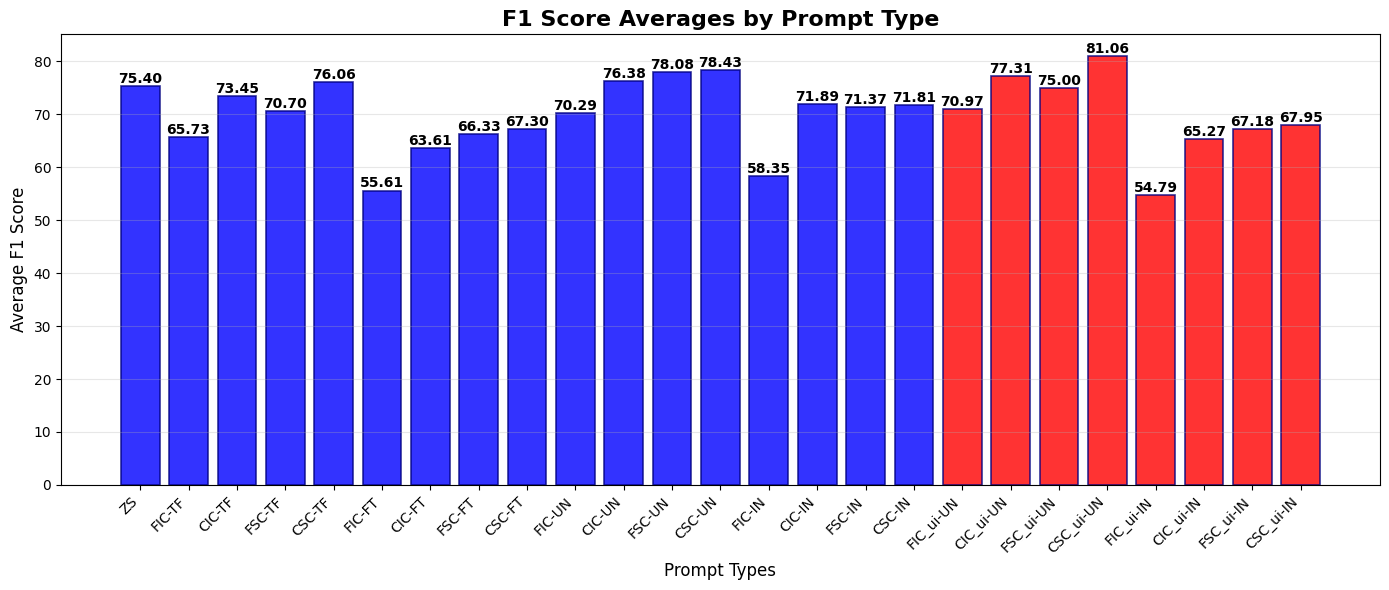

In [58]:
dataset = 'D5'
candidate_pairs = 'standard_blocking'

results_extraction_main(dataset, candidate_pairs)


'Dataset D6   - standard_blocking'

Prompt Types,Average F1
ZS,60.883872
FIC-TF,54.660423
CIC-TF,55.634917
FSC-TF,51.767723
CSC-TF,52.141487
FIC-FT,51.219049
CIC-FT,53.917476
FSC-FT,51.534741
CSC-FT,52.784898
FIC-UN,59.475915


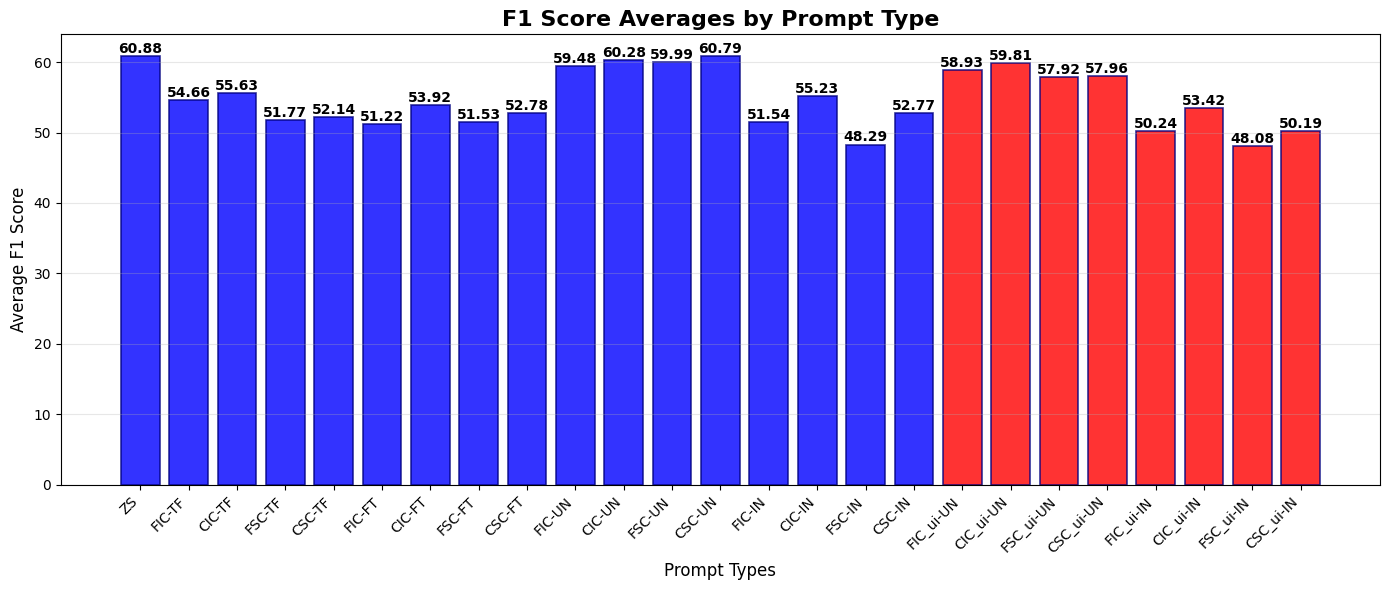

In [60]:
dataset = 'D6'
candidate_pairs = 'standard_blocking'

results_extraction_main(dataset, candidate_pairs)

'Dataset D7   - standard_blocking'

Prompt Types,Average F1
ZS,60.637995
FIC-TF,53.788128
CIC-TF,55.579668
FSC-TF,51.981523
CSC-TF,51.870214
FIC-FT,52.345519
CIC-FT,55.306975
FSC-FT,56.088278
CSC-FT,49.876019
FIC-UN,59.901477


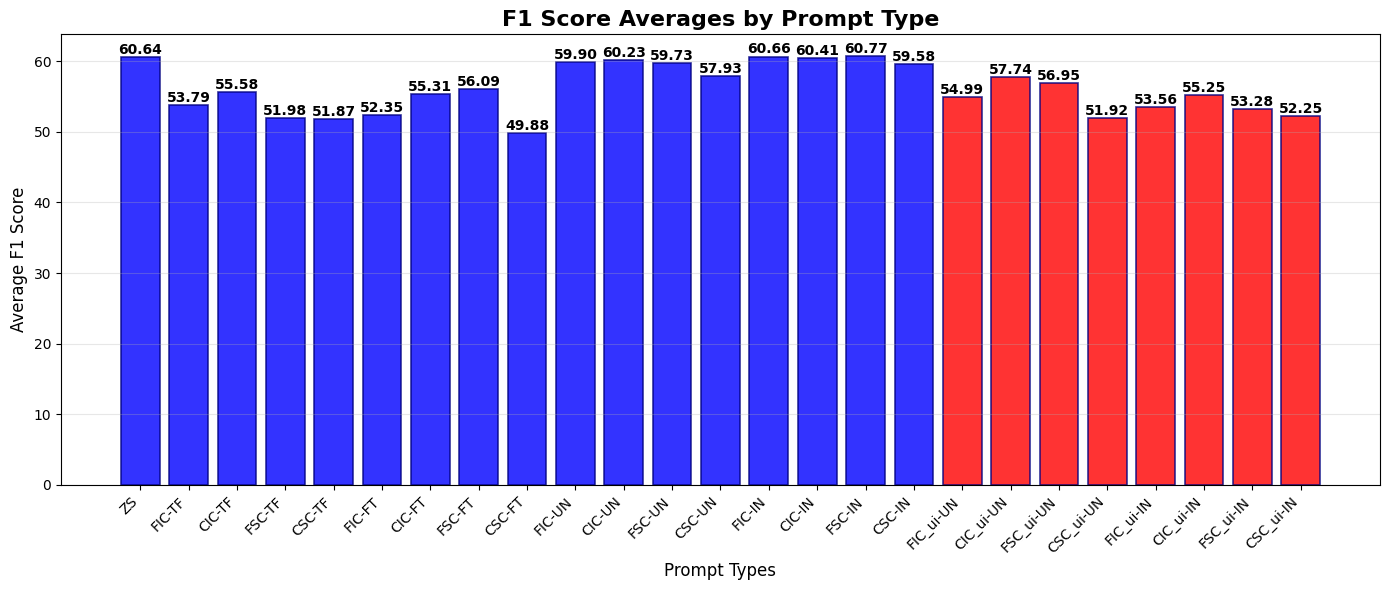

In [61]:
dataset = 'D7'
candidate_pairs = 'standard_blocking'
results_extraction_main(dataset, candidate_pairs)


'Dataset D8   - standard_blocking'

Prompt Types,Average F1
ZS,55.642561
FIC-TF,46.599745
CIC-TF,48.080943
FSC-TF,46.579423
CSC-TF,45.106089
FIC-FT,44.396832
CIC-FT,44.621864
FSC-FT,44.008178
CSC-FT,43.679742
FIC-UN,52.073140


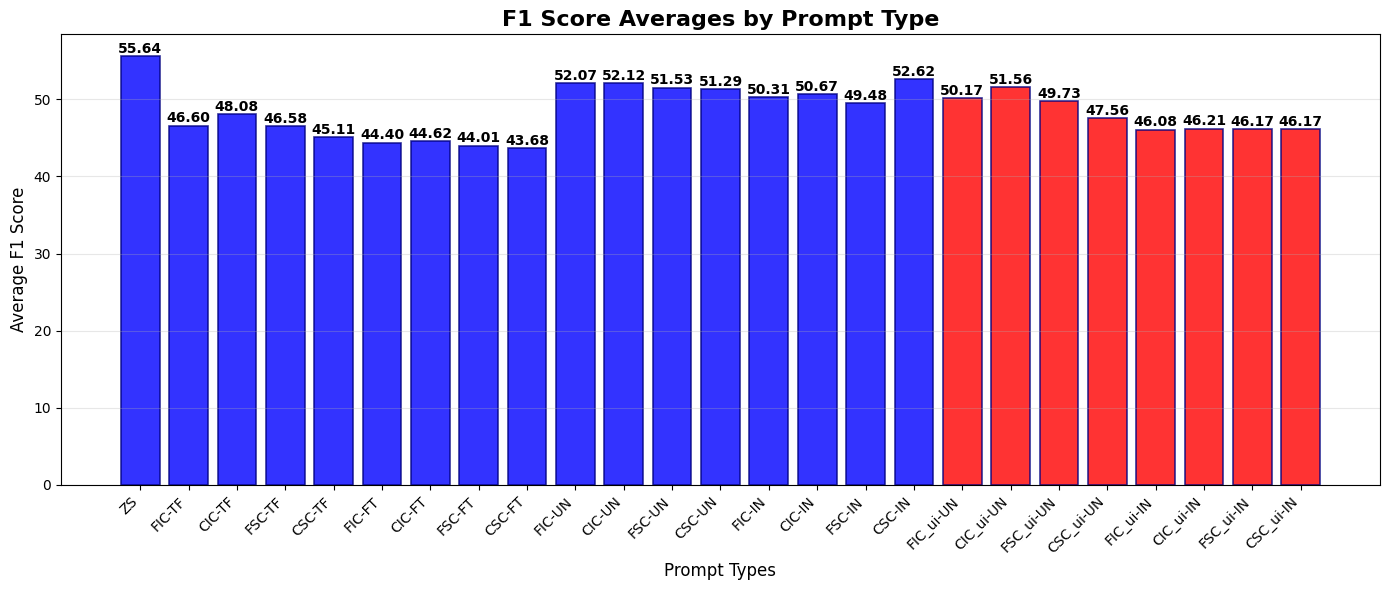

In [62]:
dataset = 'D8'
candidate_pairs = 'standard_blocking'

results_extraction_main(dataset, candidate_pairs)
